In [1]:
# Set seed for reproducibility
set.seed(123)

# Number of repetitions for the entire process
n_repetitions <- 50

# Number of data points in training and test sets
n_samples <- 100

# Parameters for the Normal distribution
true_mean <- 3
true_variance <- 9
true_sd <- sqrt(true_variance) # rnorm uses standard deviation


# Vector to store the Mean Squared Sum for training, test data for each repetition
train_mse_results <- numeric(n_repetitions)
test_mse_results <- numeric(n_repetitions)


In [2]:
# --- Start the Simulation Loop ---

for (i in 1:n_repetitions) {

  # 1. Generate Training Data
  train_data <- rnorm(n_samples, mean = true_mean, sd = true_sd)

  # 2. Calculate the Sample Mean from Training Data
  train_sample_mean <- mean(train_data)

  # 3. Calculate MSE on Training Data
  train_squared_diff <- (train_data - train_sample_mean)^2
  train_mse <- mean(train_squared_diff)
  train_mse_results[i] <- train_mse

  # 4. Generate Test Data (Evaluation Data)
  test_data <- rnorm(n_samples, mean = true_mean, sd = true_sd)

  # 5. Calculate MSE on Test Data using the Training Sample Mean
  test_squared_diff <- (test_data - train_sample_mean)^2
  test_mse <- mean(test_squared_diff)
  test_mse_results[i] <- test_mse

} # End of the simulation loop

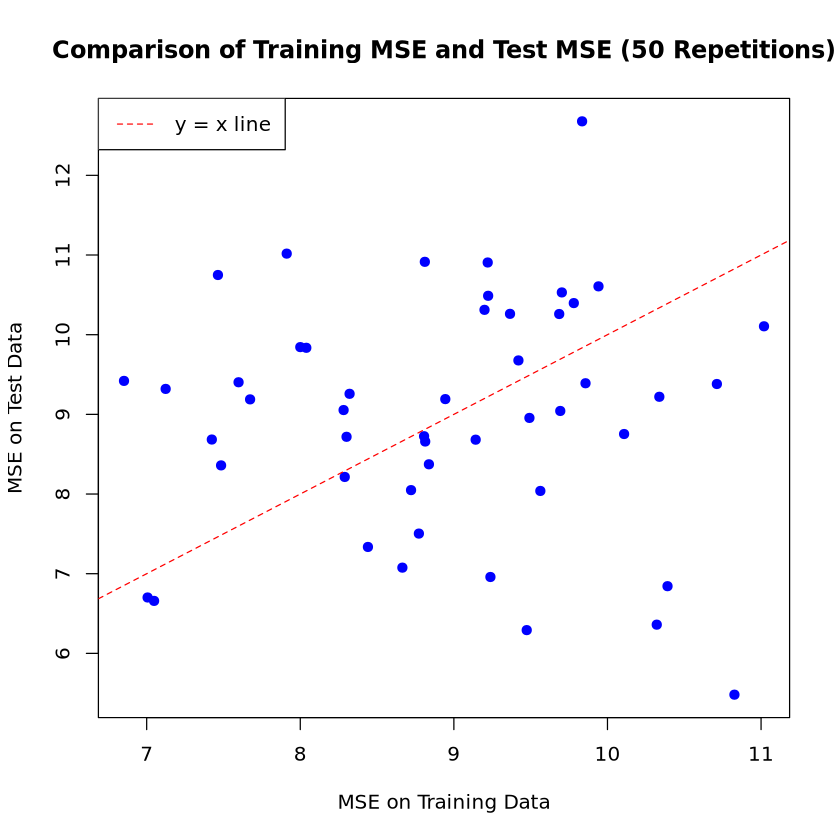

In [3]:
# --- Visualize the Results ---

plot(train_mse_results, test_mse_results,
     main = "Comparison of Training MSE and Test MSE (50 Repetitions)",
     xlab = "MSE on Training Data",
     ylab = "MSE on Test Data",
     pch = 19,
     col = "blue")

# Add a diagonal line (y=x) for reference
abline(a = 0, b = 1, col = "red", lty = 2) # lty=2 makes the line dashed

# Add a legend
legend("topleft", legend = "y = x line", col = "red", lty = 2)